<a href="https://colab.research.google.com/github/tuomaseerola/emr/blob/main/audio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter X Code

A Jupyter notebook with code examples in Python for _Chapter X (Audio Analysis)_ of _Routlegde_ book titled **[How to Conduct Empirical Music Research](https://github.com/tuomaseerola/emr)** by [Tuomas Eerola](https://www.durham.ac.uk/staff/tuomas-eerola/), [Music and Science Lab]() at [Durham University](https://www.durham.ac.uk) and [Music and Science Lab](https://musicscience.net) scheduled to be published in 2023.

To run the code in your browser, open the file in Colab (click the icon "Open in Colab"). Alternatively, you can download the notebook and run it locally.

This notebook demonstrates .......  

File `ChX_xxxxx.ipynb` | Version `29/9/2022` | [Back to Index](https://github.com/tuomaseerola/emr)

---


In [2]:
import os
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
from matplotlib import pyplot as plt 
%matplotlib inline
print(librosa.__version__)

0.8.1


## 2. Read audio files

Here are a few audio files that come with Librosa. We can use any of them in the subsequent sections. Just remove the hashtag in front of the line to get that audio file.

The following code also shows how to select only a _segment_ of an audio file. This is done by keywords `offset` and `duration`. Offset specifies where you want to start the segment (in seconds) and duration (also in seconds) is self-explanatory.

**TASK:** Try out some of the audio examples yourself. To select one, remove the hashtag (#) from the beginning of the line. NB. Only one audio example should be run at a time, so make sure that the rest of the 'filename' commands have a # in front of them.


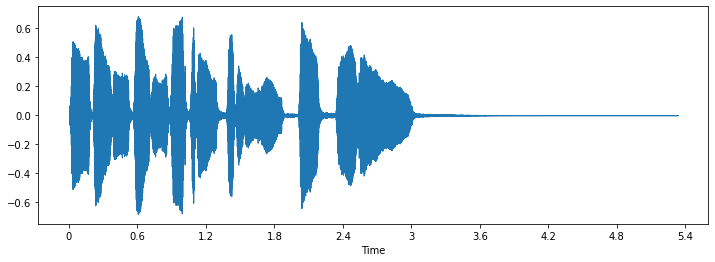

In [3]:
filename = librosa.ex('trumpet')   # Mihai Sorohan - Monophonic trumpet recording
#filename = librosa.ex('brahms')    # Hungarian Dance #5
#filename = librosa.ex('choice')    # A short drum and bass loop
#filename = librosa.ex('fishin')    # Karissa Hobbs - Let’s Go Fishin’ A folk/pop song with verse/chorus/verse structure and vocals
#filename = librosa.ex('nutcracker')# Tchaikovsky - Dance of the Sugar Plum Fairy
#filename = librosa.ex('vibeace')   # 60-second clip
x, sr = librosa.load(filename, duration=20) # if you want to start the segment from a specific point, add offset = [2 for example] in the command

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y=x,sr=sr)
ipd.display(ipd.Audio(data=x, rate=sr))

### Additional Info
This is how to load example sound files from my Github pages. These are the instrument sounds used in Lecture 3 and some other examples (named example1b-d).
**TASK:** import 2 different audio files (one at a time) and notice the different wave forms. Remember to put a # in front of the examples you are not using.

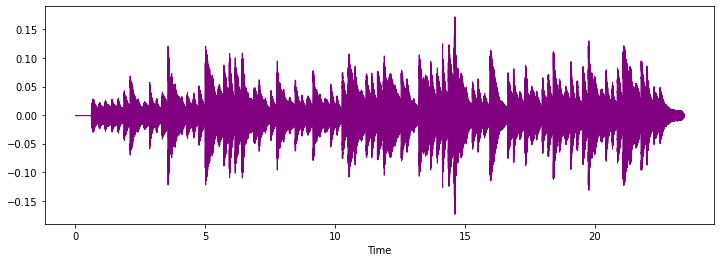

In [8]:
import soundfile as sf
import io
from six.moves.urllib.request import urlopen

#url = "https://raw.githubusercontent.com/tuomaseerola/audio/master/clar_one_note.wav"
#url = "https://raw.githubusercontent.com/tuomaseerola/audio/master/trumpet_one_note.wav"
#url = "https://raw.githubusercontent.com/tuomaseerola/audio/master/harp_one_note.wav"
#url = "https://raw.githubusercontent.com/annaliesemg/audio/master/example1d.wav"
url = "https://raw.githubusercontent.com/annaliesemg/audio/master/example1b.wav"
#url = "https://raw.githubusercontent.com/annaliesemg/audio/master/example1c.wav"
#url = "https://raw.githubusercontent.com/tuomaseerola/audio/master/harpsichord_one_note.wav"

Y, samplerate = sf.read(io.BytesIO(urlopen(url).read()))
#mono=librosa.to_mono(np.rot90(data))
#Ym=librosa.resample(Y, samplerate, 22050)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y=Y,sr=samplerate,color='purple')
ipd.display(ipd.Audio(data=Y, rate=samplerate))

## 3. Analyse loudness
First extract RMS (Root Mean Square) energy and convert this into decibels.



Text(0, 0.5, 'dB')

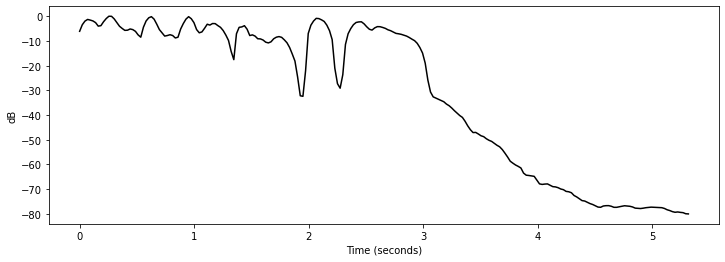

In [9]:
filename = librosa.ex('trumpet') #PROMPT: Plot the loudness for nutcracker and brahms excerpts. Which one has more dynamic changes?
x, sr = librosa.load(filename, duration = 20)
ipd.display(ipd.Audio(data=x, rate=sr))

rms=librosa.feature.rms(y=x)                 # Extra dynamics (RMS)
db=librosa.amplitude_to_db(rms,ref=np.max)   # Convert into dB. Note that this is a relative measure (loudest is now 0) 
times = librosa.times_like(rms)

plt.figure(figsize=(12, 4))
plt.plot(times, db[0],color='black')
plt.xlabel('Time (seconds)')
plt.ylabel('dB')

## 4. Analyse pitch
This is best done with a monophonic example, although librosa has algorithm to track all pitches as well. Here we extract the fundamental frequency of the trumpet solo using a probabilistic variant of the so-called YIN method. The variant is by Mauch and Dixon (2014) and the original technique was proposed by De Cheveigne and Kawahara (2002).




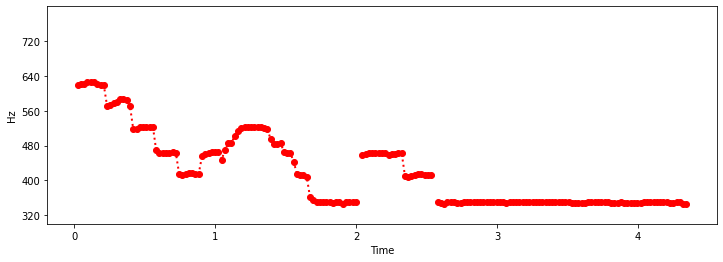

In [10]:
filename = librosa.ex('trumpet')   # Mihai Sorohan - Monophonic trumpet recording  #PROMPT: Run this code with the trumpet recording 
x, sr = librosa.load(filename)
ipd.display(ipd.Audio(data=x, rate=sr))    #code added to hear audio file

# This is where the pyin algorithm is applied. fmin refers to the lower frequency threshold and fmax to higher frequence threshold.
f0, voiced_flag, voiced_probs = librosa.pyin(x, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C6'))
times = librosa.times_like(f0)

# Plot the fundamental frequency
plt.figure(figsize=(12, 4))
plt.plot(times,f0,'ro:', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Hz')
ax=plt.gca()
ax.yaxis.set_major_formatter(librosa.display.LogHzFormatter())
ax.set(yticks=[320,320+80,320+80*2,320+80*3,320+80*4,320+80*5])
ax.set(ylim=[300, 800])
ax.yaxis.set_major_formatter(librosa.display.LogHzFormatter())



## 5. Analyse Spectrum / Spectrogram
- Try out the spectrogram with two different audio files from the available ones listed in Section 2 (trumpet sound vs example1d)



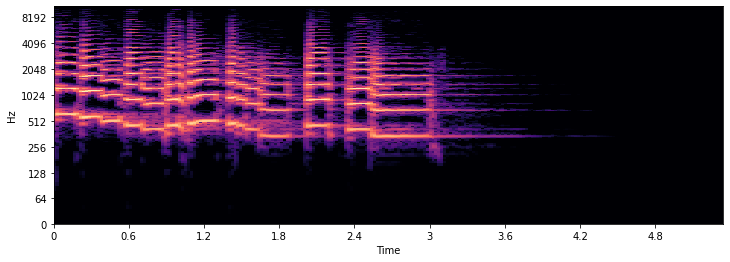

In [11]:
filename = librosa.ex('trumpet') #PROMPT: Try this out with the trumpet audio example. What is the spectrogram telling you?

import librosa.display
import matplotlib.pyplot as plt

x, sr = librosa.load(filename)  #for the example1d file, put a # in front of this line of code

#Nfft = 512
stft = np.abs(librosa.stft(x))
freqs = librosa.fft_frequencies(sr=sr)

ipd.display(ipd.Audio(data=x, rate=sr))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), x_axis='time', y_axis='log')

F4


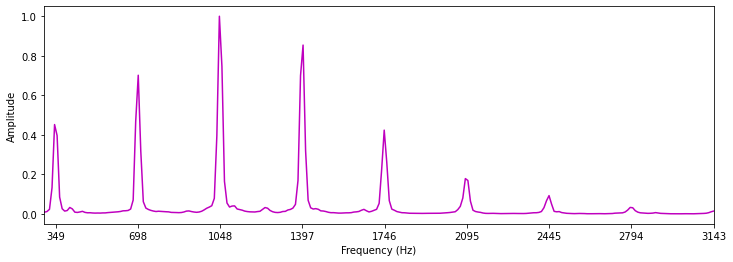

In [12]:
## PROMPT: Look at the trumpet sound again. Take only the last note. Which frequency has the highest amplitude?
filename = librosa.ex('trumpet')   # Mihai Sorohan - Monophonic trumpet recording
x, sr = librosa.load(filename,offset=2.6,duration=0.75)     
stft = np.abs(librosa.stft(x))
f0, voiced_flag, voiced_probs = librosa.pyin(x, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
f=np.nanmedian(f0)        # Get the Hz of the fundamental frequency for nice labels
n=librosa.hz_to_note(f)  # Convert Hz to note name
print(n)
x=np.arange(f,f*10,f)

plt.figure(figsize=(12, 4))
# collapse across time and plot a spectrum representation (energy across frequencies)
Dmean=stft.mean(axis=1)/max(stft.mean(axis=1))
plt.plot(freqs,Dmean,color='m')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([300, 2000])
plt.xticks(x);


## 6. Extract onsets
This estimates the strength of possible onsets and then detects the onsets that are stronger than a threshold defined in the algorithm. There is also a beat tracking that uses the onsets to estimate beat in the music.

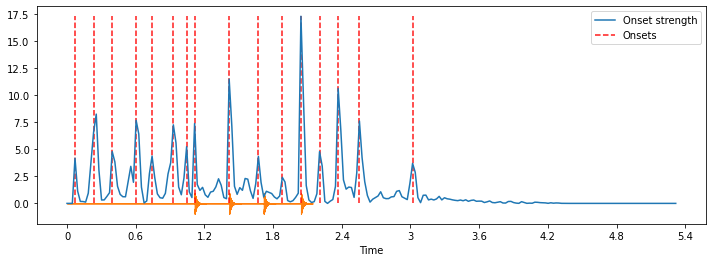

In [13]:
filename = librosa.ex('trumpet')   # Mihai Sorohan - Monophonic trumpet recording

x, sr = librosa.load(filename,duration=20) 

o_env = librosa.onset.onset_strength(x, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

plt.figure(figsize=(12, 4))

plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
           linestyle='--', label='Onsets')
plt.legend()

# Sonify the detected beat events
tempo, beats = librosa.beat.beat_track(y=x, sr=sr,trim=True)
#y_beats = librosa.clicks(frames=onset_frames, sr=sr) # was beats
y_beats = librosa.clicks(frames=beats, sr=sr) 

combined = (x[0:len(y_beats)]+y_beats)/2

librosa.display.waveshow(y=y_beats,sr=sr)
ipd.display(ipd.Audio(data=combined, rate=sr))

In [14]:
## PROMPT:Calculate the approximate tempo of the example

y, sr = librosa.load(filename,duration=25) 
onset_env = librosa.onset.onset_strength(y, sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
print(np.round(tempo,1),'BPM')


[123.] BPM
